<a href="https://colab.research.google.com/github/datacorner/les-tutos-datacorner.fr/blob/master/data-prep/Utiliser_la_Variance_S%C3%A9lection_de_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from google.colab import data_table
# Display smart tables into colab ;-)
data_table.enable_dataframe_formatter()

# Dataset presentation

In [4]:
tab = [[4,1,0,0,0,0,1,5,4,0,0,0,1], 
      [3,8,0,1,0,0,1,5,1,1,4,5,1], 
      [2,2,0,0,0,0,8,1,4,1,2,8,1], 
      [4,7,2,0,0,0,1,2,2,0,4,9,2], 
      [2,1,0,0,5,0,1,5,4,1,4,8,1]]

dataset = pd.DataFrame(tab)

In [5]:
dataset.shape

(5, 13)

In [6]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4,1,0,0,0,0,1,5,4,0,0,0,1
1,3,8,0,1,0,0,1,5,1,1,4,5,1
2,2,2,0,0,0,0,8,1,4,1,2,8,1
3,4,7,2,0,0,0,1,2,2,0,4,9,2
4,2,1,0,0,5,0,1,5,4,1,4,8,1


# Columns Data visualisation

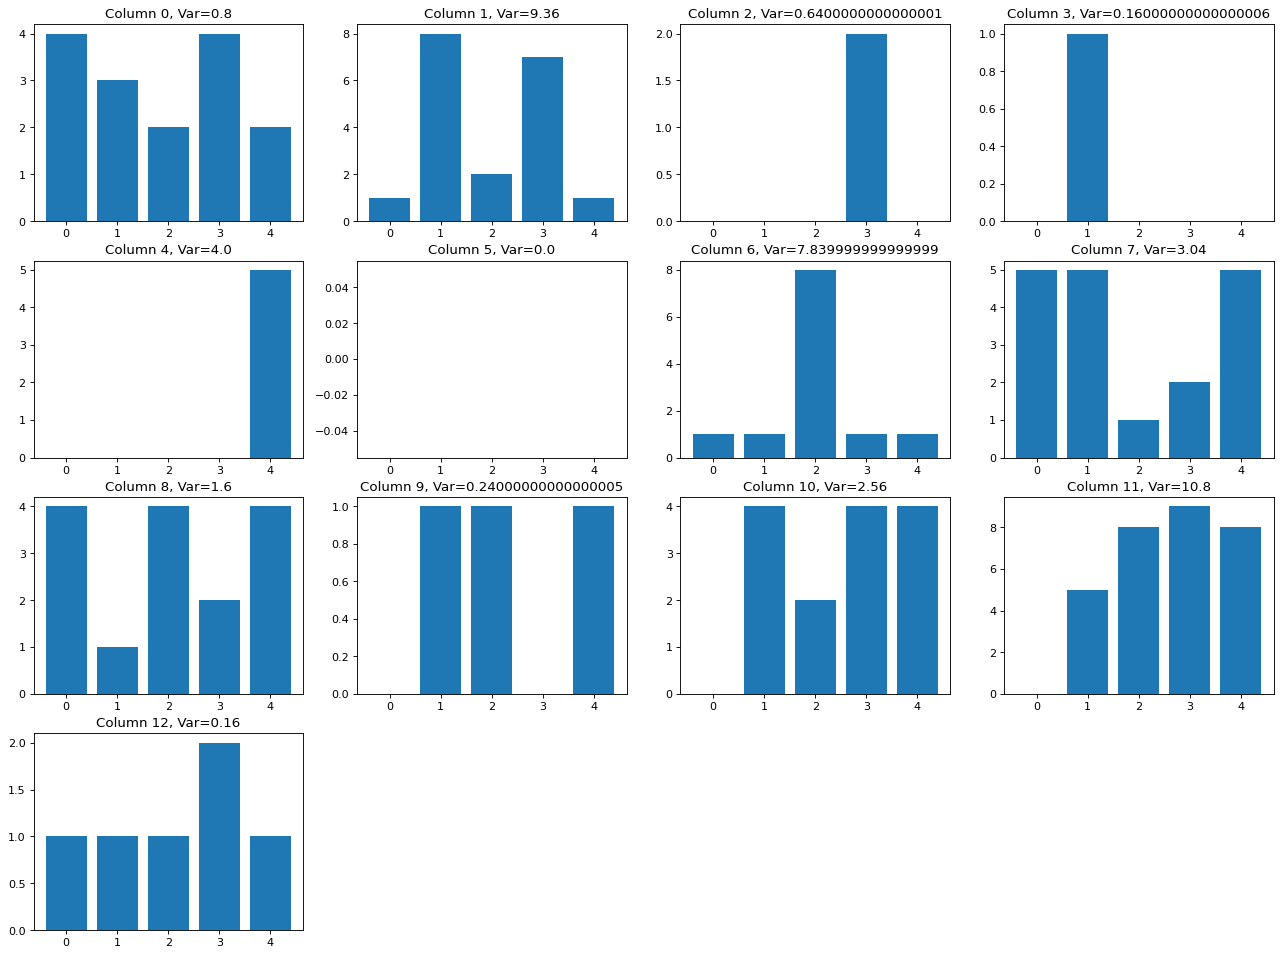

In [63]:
figure(figsize=(20, 15), dpi=80)

def displayColumnDistribution(_dataset):
  for i in range(dataset.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.title('Column ' + str(i) + ', Var=' + str(np.var(dataset[i])))
    x = np.arange(dataset.shape[0])
    plt.bar(x, dataset[i])

displayColumnDistribution(dataset)

# Variance Thresold removal with sklearn

Only get the list of columns to remove

In [ ]:
vt = VarianceThreshold() # Threshold default is 0
_ = vt.fit(dataset)
var_vector_mask = vt.get_support()
var_vector_mask

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

Filter the dataset with the calculated mask (var_vector_mask):

In [ ]:
dataset_result = dataset.loc[:, var_vector_mask]
dataset_result

,0,1,2,3,4,6,7,8,9,10,11,12
0,0,0,0,0,0,1,5,4,0,0,0,1
1,0,0,0,1,0,1,5,1,1,4,5,1
2,0,0,0,0,0,8,1,4,1,2,8,1
3,4,0,2,0,0,1,2,2,0,4,9,2
4,0,1,0,0,5,1,5,4,1,4,8,1


Columns/Feature N°5 has been removed. Let's take a look on it :

In [ ]:
dataset[5]

0    0
1    0
2    0
3    0
4    0
Name: 5, dtype: int64

This feature is constant (so Variance is null, that is why it has been removed)

# Calculate the Variance for all features

In [ ]:
import numpy as np
for i in range(dataset.shape[1]):
  print("Variance for feature N°", str(i), ": ", np.var(dataset[i]))

Variance for feature N° 0 :  2.5600000000000005
Variance for feature N° 1 :  0.16000000000000003
Variance for feature N° 2 :  0.6400000000000001
Variance for feature N° 3 :  0.16000000000000006
Variance for feature N° 4 :  4.0
Variance for feature N° 5 :  0.0
Variance for feature N° 6 :  7.839999999999999
Variance for feature N° 7 :  3.04
Variance for feature N° 8 :  1.6
Variance for feature N° 9 :  0.24000000000000005
Variance for feature N° 10 :  2.56
Variance for feature N° 11 :  10.8
Variance for feature N° 12 :  0.16


# Change the Threshold
 Now change the Threshold to 1

In [ ]:
vt = VarianceThreshold(threshold=1)

# Fit
_ = vt.fit(dataset)
# Get the boolean mask
mask = vt.get_support()
dataset_reduced = dataset.loc[:, mask]

In [ ]:
dataset_reduced.shape

(5, 7)

In [ ]:
dataset_reduced

,0,4,6,7,8,10,11
0,0,0,1,5,4,0,0
1,0,0,1,5,1,4,5
2,0,0,8,1,4,2,8
3,4,0,1,2,2,4,9
4,0,5,1,5,4,4,8


In [9]:
selector = VarianceThreshold(threshold=1)
dataset_reduced = selector.fit_transform(dataset)
dataset_reduced

array([[1, 0, 1, 5, 4, 0, 0],
       [8, 0, 1, 5, 1, 4, 5],
       [2, 0, 8, 1, 4, 2, 8],
       [7, 0, 1, 2, 2, 4, 9],
       [1, 5, 1, 5, 4, 4, 8]])